**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

# Instructions
### Help AZ Watch improve their marketing strategies by answering the following questions about their subscribers.
### What is the predicted subscriber churn for AZ Watch?
### Apply the necessary processing steps to prepare the data for modeling.
### Train three standard classification models and save these as model1, model2, and model3.
## Aim to acheive a minimum accuracy of 90% for at least one of the models. Save your best accuracy score as score.

### AZ Watch wants to establish more personalized and targeted campaigns to reduce subscriber churn. What subscriber segments can be identified in the data to make their campaigns more targeted?
## Apply a standard clustering method to the numerical features X. Analyze the average values by cluster_id for these numerical features and store them in analysis, rounding values to the nearest whole number.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

file_path = "data/AZWatch_subscribers.csv"

df = pd.read_csv(file_path)

## Some data exploratory analysis first...

In [2]:
# Start your code here! Use as many cells as you like
df

,subscriber_id,age_group,engagement_time,engagement_frequency,subscription_status
0,14451,18-34,5.55,7,subscribed
1,18386,under 18,5.12,12,subscribed
2,12305,35 and over,4.25,4,churned
3,17546,18-34,8.54,15,subscribed
4,15399,18-34,12.12,20,subscribed
...,...,...,...,...,...
995,17439,35 and over,3.12,23,subscribed
996,10112,35 and over,5.25,8,subscribed
997,10692,35 and over,2.37,5,churned
998,11164,18-34,8.19,8,subscribed


In [3]:
df.dtypes

subscriber_id             int64
age_group                object
engagement_time         float64
engagement_frequency      int64
subscription_status      object
dtype: object

In [4]:
df['age_group'].unique()

array(['18-34', 'under 18', '35 and over'], dtype=object)

<AxesSubplot: xlabel='engagement_time', ylabel='age_group'>

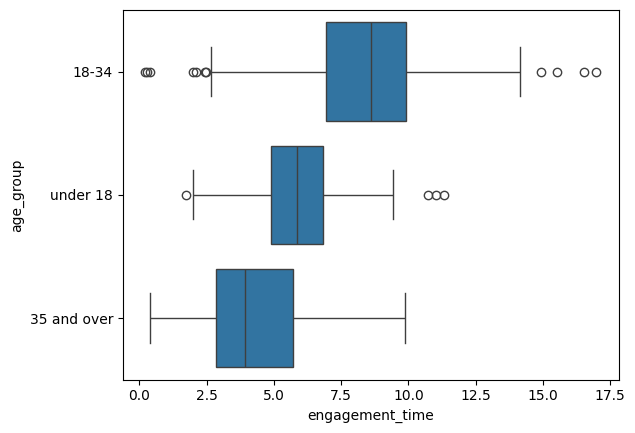

In [5]:
sns.boxplot(data=df, x='engagement_time', y='age_group')

<AxesSubplot: xlabel='engagement_frequency', ylabel='age_group'>

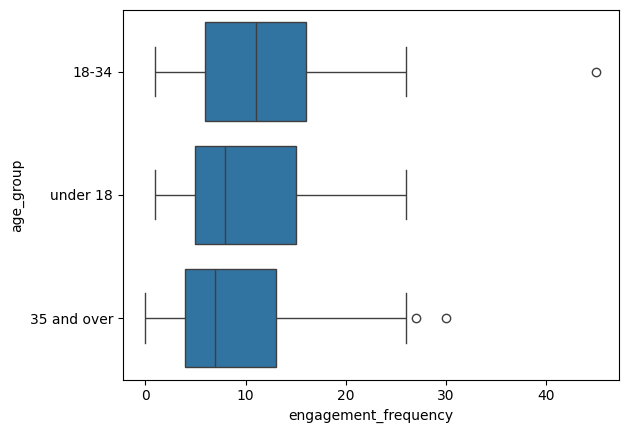

In [6]:
sns.boxplot(data=df, x='engagement_frequency', y='age_group')

## Now let's preprocess the data for machine learning...
### First, we create a new column with the labels defined by the 'subscription_status' column and drop the latter as well as the 'subscriber_id' information, since it does not contain relevant data for our modelling

In [7]:
df['label'] = df['subscription_status'].apply(lambda x : 1 if x=='churned' else 0)
df.drop(['subscription_status','subscriber_id'], axis=1, inplace=True)
df

,age_group,engagement_time,engagement_frequency,label
0,18-34,5.55,7,0
1,under 18,5.12,12,0
2,35 and over,4.25,4,1
3,18-34,8.54,15,0
4,18-34,12.12,20,0
...,...,...,...,...
995,35 and over,3.12,23,0
996,35 and over,5.25,8,0
997,35 and over,2.37,5,1
998,18-34,8.19,8,0


### Secondly, we use pandas to one-hot encode the 'age_group' column

In [8]:
df_onehot = pd.get_dummies(df, columns=['age_group'], drop_first=True, prefix='age')
df_onehot

,engagement_time,engagement_frequency,label,age_35 and over,age_under 18
0,5.55,7,0,0,0
1,5.12,12,0,0,1
2,4.25,4,1,1,0
3,8.54,15,0,0,0
4,12.12,20,0,0,0
...,...,...,...,...,...
995,3.12,23,0,1,0
996,5.25,8,0,1,0
997,2.37,5,1,1,0
998,8.19,8,0,0,0


### Now we deal with the numerical variables 'engagement_time' and 'engagement_frequency', bringing both to the same scale and creating a new dataframe with only these columns, which will be used later on

In [9]:
scaler = StandardScaler()
scaled_df =     scaler.fit_transform(df_onehot[['engagement_time','engagement_frequency']])
scaled_df = pd.DataFrame(scaled_df, columns=['engagement_time','engagement_frequency'])
scaled_df

,engagement_time,engagement_frequency
0,-0.228621,-0.477723
1,-0.384656,0.324364
2,-0.700355,-0.958975
3,0.856369,0.805616
4,2.155453,1.607703
...,...,...
995,-1.110401,2.088955
996,-0.337483,-0.317305
997,-1.382556,-0.798558
998,0.729363,-0.317305


### We are then left with only the one-hot encoded variable 'age_group' in a separate dataframe...
### Also, the previously created 'label' column can now be separated in a unique, target-dataframe, 'y'

In [10]:
y = df_onehot.label
df_categorical = df_onehot.drop(['label','engagement_frequency','engagement_time'], axis=1)
df_categorical

,age_35 and over,age_under 18
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0
...,...,...
995,1,0
996,1,0
997,1,0
998,0,0


### Now that all variables have properly been preprocessed, we can combine both dataframes (the one with scaled numerical features and the one with the one-hot encoded categorical feature) into one:

In [11]:
df = scaled_df.merge(right=df_categorical,
                    how='left',
                    left_index=True,
                    right_index=True)
df

,engagement_time,engagement_frequency,age_35 and over,age_under 18
0,-0.228621,-0.477723,0,0
1,-0.384656,0.324364,0,1
2,-0.700355,-0.958975,1,0
3,0.856369,0.805616,0,0
4,2.155453,1.607703,0,0
...,...,...,...,...
995,-1.110401,2.088955,1,0
996,-0.337483,-0.317305,1,0
997,-1.382556,-0.798558,1,0
998,0.729363,-0.317305,0,0


## Now that we have our dataset ready for modelling, we can start creating and testing our models...

### In the following cells, we create a features-dataframe, X, and split it together with the target-dataframe, y, into training and testing sets. 80% of our datapoints goes to training and 20% goes to testing our models

In [12]:
X = df

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

### Now we instantiate three different models to check their accuracies in predicting customer churn!

In [14]:
model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()
model3 = LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracies = []
for i,j in [(model1,'Random Forest Classifier'), (model2, 'Decision Tree Classifier'), (model3, 'Logistic Regression')]:
    i.fit(X_train, y_train)
    preds = i.predict(X_test)
    acc = accuracy_score(y_test,preds)
    print('The '+j+' model got '+str(acc*100)+'% of accuracy!')
    accuracies.append(acc)
print(accuracies)

The Random Forest Classifier model got 88.5% of accuracy!
The Decision Tree Classifier model got 86.5% of accuracy!
The Logistic Regression model got 92.5% of accuracy!
[0.885, 0.865, 0.925]


In [17]:
score = accuracies[2]

### At the end, the logistic regression model performed the best and achieved a high accuracy even without hyperparameter tuning. We then save our highest accuracy score, which is higher than 90% as the assignment required, and move forward to the next task...

## Now we need to group our customers into segments, and for that end we will make use of a unsupervised learning algorithm: KMeans clustering!

### To do so, we first need to assess the best spliting of our data, and we'll be using the Davies-Bouldin score to measure the clustering in [2,29] clusters:

In [18]:
from sklearn.metrics import davies_bouldin_score

[Text(0.5, 0, 'Number of clusters'), Text(0, 0.5, 'Davies-Bouldin Index')]

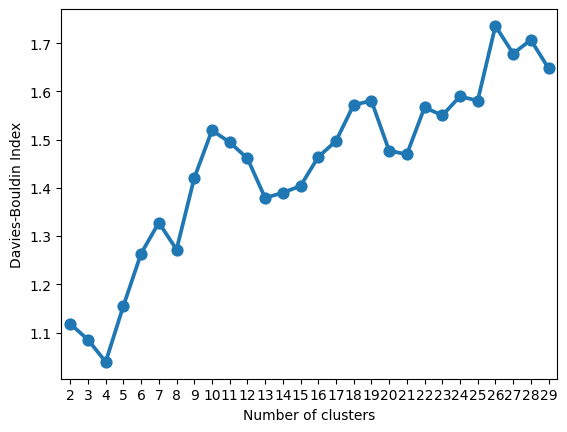

In [19]:
scores = {}
for i in range(2,30):
    kmeans = KMeans(n_clusters=i, random_state=13)
    kmeans.fit(scaled_df)
    scores[i] = davies_bouldin_score(X, kmeans.labels_)
sns.pointplot(x=scores.keys(),y=scores.values()).set(xlabel='Number of clusters',ylabel='Davies-Bouldin Index')

### Having found that 4 clusters gives the minimum (thus, the best) Davies-Bouldin score, we can now fit our data in a new 4-way segmentation KMeans using scaled_df, the dataframe of scaled numerical features defined above

In [20]:
kmeans = KMeans(n_clusters=4, random_state=13).fit(scaled_df)

### OK, now it's time to see the average of each (scaled) numerical feature in each segment of our customers dataset

In [21]:
segmentation = scaled_df.assign(cluster_id=kmeans.labels_)

analysis = segmentation.groupby(['cluster_id']).agg({
    'engagement_time':'mean',
    'engagement_frequency':'mean'
}).round(0)
analysis

,engagement_time,engagement_frequency
cluster_id,,
0,-0.0,1.0
1,-1.0,-1.0
2,1.0,1.0
3,1.0,-0.0


### For a better grasp of what this table means, we can unscale the data back to its original dimensions...

In [22]:
unscaled_df = scaled_df.copy()

In [23]:
unscaled_df[['engagement_time','engagement_frequency']] = scaler.inverse_transform(scaled_df[['engagement_time','engagement_frequency']])

In [24]:
unscaled_df['cluster_id'] = kmeans.labels_

In [25]:
unscaled_data = unscaled_df.groupby('cluster_id').agg({
    'engagement_time':'mean',
    'engagement_frequency':'mean'
}).round(0)

In [26]:
unscaled_data

,engagement_time,engagement_frequency
cluster_id,,
0,6.0,18.0
1,4.0,5.0
2,10.0,16.0
3,8.0,7.0


### The above table tells us that segment 2 spends, on average, 10 minutes in each session on AZ Watch, with an average of 16 sessions every week - this group is thus the less likely to churn and the most likely to respond positively to special offers and loyalty programs! 
### On the other hand, segment 1 spends only 4 minutes in each session, with only 5 sessions per week, and this group is therefore the most likely to churn, that is, the best target for re-engagement strategies!

## That's it! With the code developed here, AZ Watch can now predict the churning customers with more than 90% of accuracy and identify how their customers segment as well as in which segment(s) most churning customers will fall into, for targeted marketing!